# Weighted Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Linear weighting

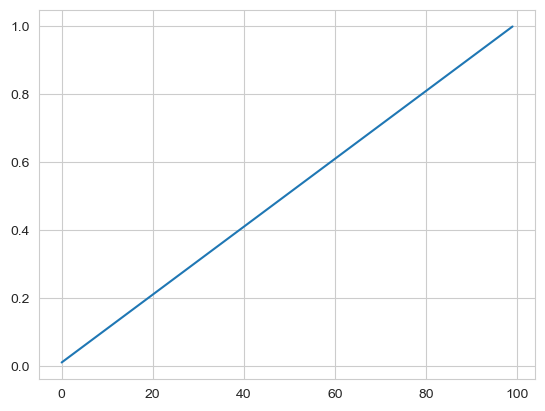

In [2]:
n = 100
x = np.arange(1, n+1) / n
plt.plot(x)

#### Inverse weighting

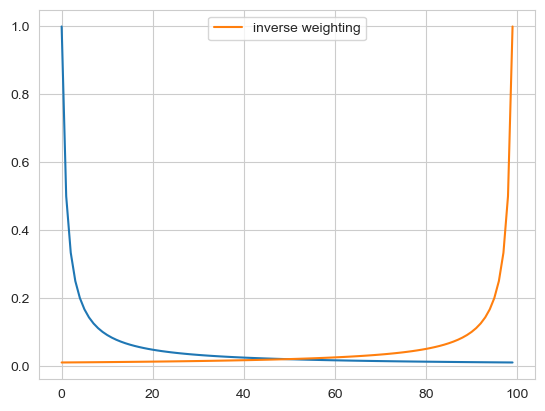

In [3]:
x = n - np.arange(1, n+1) + 1
x = 1. / x
plt.plot(1 / np.arange(1, n+1))
plt.plot(x, label='inverse weighting')
plt.legend()

### Quadractic weighting

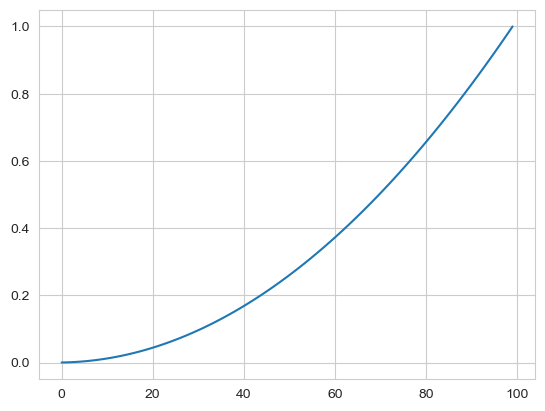

In [4]:
x = np.power(np.arange(1, n+1) / n, 2)
plt.plot(x)

### Sliding window weighting

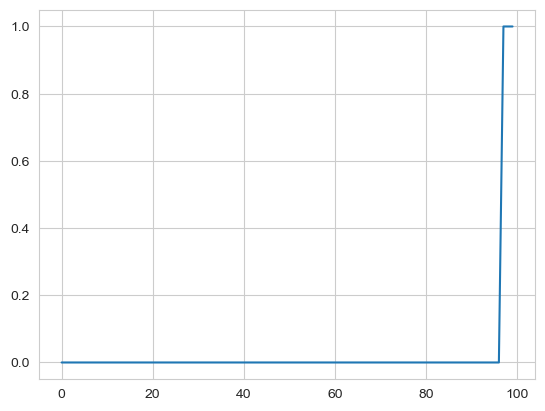

In [5]:
k = 3
i = np.arange(1, n+1)
weight_i = np.zeros(n)
weight_i[n - k: ] = 1.
plt.plot(weight_i)

### Gaussian weighting
Centered around the data point n

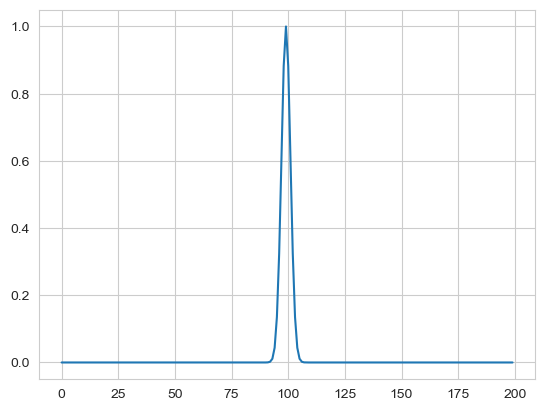

In [6]:
i = np.arange(1, 2*n+1)
sigma = 2
weight_i = np.exp(-((n - i)**2) / (2 * sigma**2))
plt.plot(weight_i)

## Weighting based on variance

### Inverse variance weighting

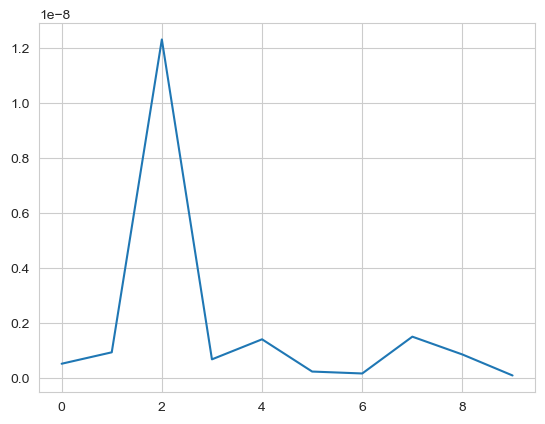

In [7]:
np.random.seed(0)
num_sensors = 10
num_samples = 100_000
data = np.zeros((num_samples, num_sensors))
for i in range(num_sensors):
    data[:, i] = np.random.normal(np.random.choice(np.arange(100_000)), np.random.choice(np.arange(100_000)), num_samples)

variance = np.var(data, axis=0)
inverse_variance = 1. / variance
plt.plot(inverse_variance, label='inverse variance')


### Inverse standard deviation weighting

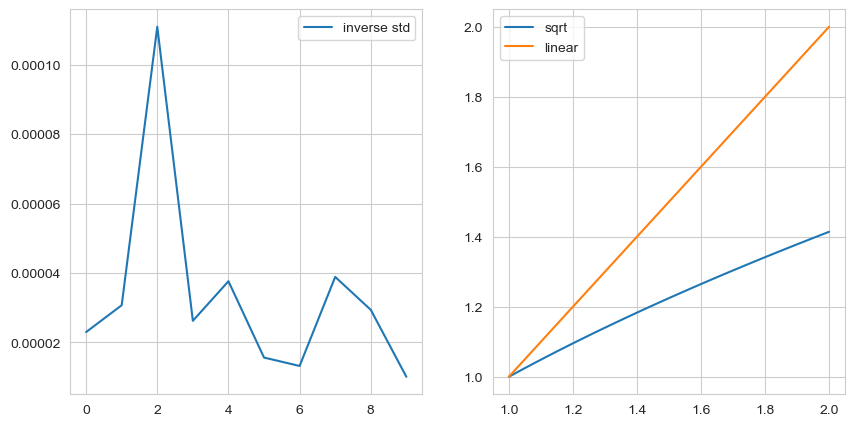

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

std = np.std(data, axis=0)

ax[0].plot(1./std, label='inverse std')
ax[0].legend()

ax[1].plot(np.linspace(1, 2, 100), np.sqrt(np.linspace(1, 2, 100)), label='sqrt')
ax[1].plot(np.linspace(1, 2, 100), np.linspace(1, 2, 100), label='linear')
ax[1].legend()

### Normalized inverse variance weighting

[]

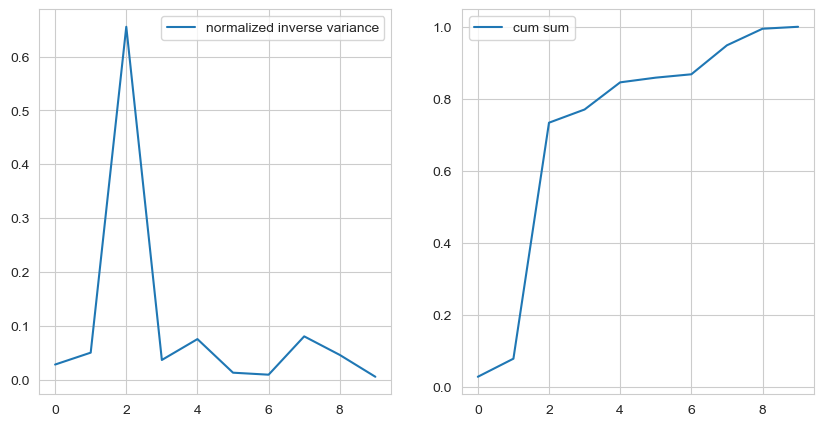

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

std = np.std(data, axis=0)

weights_i = inverse_variance / np.sum(inverse_variance)
ax[0].plot(weights_i, label='normalized inverse variance')
ax[0].legend()

ax[1].plot(np.cumsum(weights_i), label='cum sum')
ax[1].legend()

plt.plot()

### Inverse relative variance weighting

In [11]:
data = pd.DataFrame({
    'Stock': ['A', 'B', 'C'],
    'Return': [5, 10, 15],
    'Risk': [10, 20, 100] # variance
})

data['weight'] = data['Return'] / data['Risk']
data

,Stock,Return,Risk,weight
0,A,5,10,0.50
1,B,10,20,0.50
2,C,15,100,0.15


## Let's fit some models

### Fit a 1D weighted linear regression model

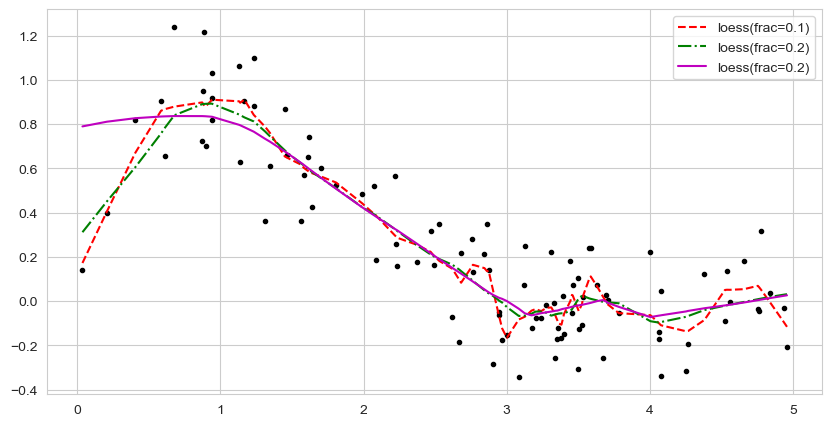

In [12]:
### Fit a loess model from statsmodel
from statsmodels.nonparametric.smoothers_lowess import lowess

x = 5*np.random.random(100)
y = np.sin(x) * 3*np.exp(-x) + np.random.normal(0, 0.2, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'k.')

y_loess_ret = lowess(y, x, frac=0.1, it = 5, return_sorted=True)
plt.plot(y_loess_ret[:, 0], y_loess_ret[:, 1], 'r--', label='loess(frac=0.1)')

y_loess_ret = lowess(y, x, frac=0.2, it=5, return_sorted=True)
plt.plot(y_loess_ret[:, 0], y_loess_ret[:, 1], 'g-.', label='loess(frac=0.2)')

y_loess_ret = lowess(y, x, frac=0.3, it=5, return_sorted=True)
plt.plot(y_loess_ret[:, 0], y_loess_ret[:, 1], 'm-', label='loess(frac=0.2)')

plt.legend()

### Fit a weighted polynomial regression model

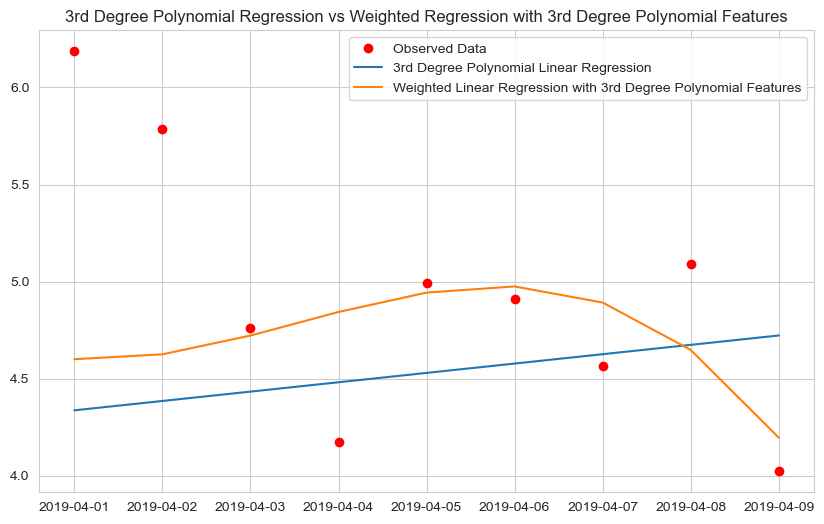

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(1234)

# Generate some sample time series data
n = 100
dates = pd.date_range(start='2019-01-01', periods=n, freq='D')
x = np.arange(n)
y = np.random.normal(0, 1, n).cumsum()

# Define the degree of the polynomial
degree = 3

# Feature matrix for the polynomial regression
X_poly = np.column_stack([x**3, x**2, x, np.ones(n)])

# OLS regression
ols_model = sm.OLS(y, x)
ols_results = ols_model.fit()
ols_y_hat = ols_results.predict(x)

# WLS regression
lam = 0.9
weights = np.exp(-lam * (x[-1] - x)) # Define the recency weights
wls_model = sm.WLS(y, X_poly, weights=weights)
wls_results = wls_model.fit()
wls_y_hat = wls_results.predict(X_poly)

# Plot the data, the third degree polynomial linear regression, and the weighted linear regression with 3rd degree polynomial features
lookback = 10
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dates[-lookback:-1], y[-lookback:-1], 'ro', label='Observed Data')
ax.plot(dates[-lookback:-1], ols_y_hat[-lookback:-1], label='3rd Degree Polynomial Linear Regression')
ax.plot(dates[-lookback:-1], wls_y_hat[-lookback:-1], label='Weighted Linear Regression with 3rd Degree Polynomial Features')

# Set the plot title and legend
ax.set_title('3rd Degree Polynomial Regression vs Weighted Regression with 3rd Degree Polynomial Features')
ax.legend()

# Show the plot
plt.show()
